In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imblearn

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (D:\Anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

(3)

In [3]:
def f(x):
    return x**4 - 6*x**2 + 4*x + 18

x_values = np.linspace(-2.5, 2.5, 1000)
y_values = f(x_values)

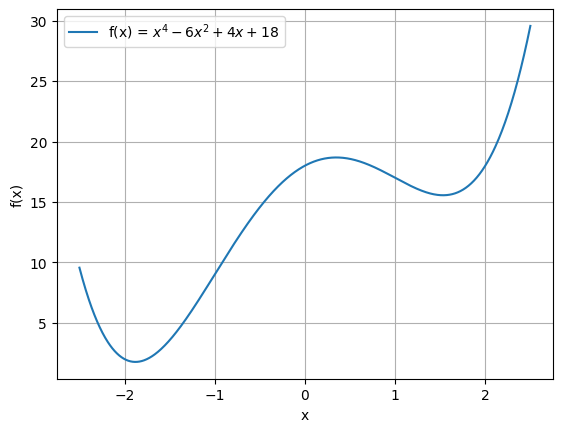

In [5]:
plt.plot(x_values, y_values, label='f(x) = $x^4 - 6x^2 + 4x + 18$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

I observed two local/global minima. It's easy to approximate the values of these two by taking the derivative of this function:

In [11]:
# F'(x) = 4x^3-12x+4
coefficients = [4, 0, -12, 4]

# Solve the cubic equation
critical_points = np.roots(coefficients)
print("Numerical Critical Points:", critical_points)

Numerical Critical Points: [-1.87938524  1.53208889  0.34729636]


The numbers for local/global minima are -1.87938524 and 1.53208889,it looks like there's no any other minima point.

(4)

In [38]:
def GD(input,alpha,S):
    output = input
    for i in range(S):
        output = output - alpha * (4 * (output**3) - 12 * output + 4)
    return output

In [40]:
GD(0,0.1,3) #Test if it's right

-2.3701509259264

(5)

In [41]:
GD(1,0.1,20)

1.5320978040292623

In [42]:
GD(0,0.1,20)

-2.380554142228462

Because there are two minima, these two appear to be in conflict, converging on different minima

(6)

In [43]:
GD(1,0.01,20)

1.4929314867366945

In [44]:
GD(0,0.01,20)

-1.6989180105534625

With a smaller learning rate, the algorithm takes smaller steps, and it might need more iterations to converge to the minimum.

## Problem 2

(1)

In [48]:
df = pd.read_csv('College.csv')
df

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [59]:
# Split the data into training and test sets
train_set = df.head(600)
test_set = df.tail(177)

(2)

In [60]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [62]:
# Check data types of selected features and the target variable
print(train_set[features].dtypes)
print(train_set[target].dtype)

Private         object
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object
int64


In [68]:
features = [ 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 
            'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 
            'perc.alumni', 'Expend', 'Grad.Rate']
target = 'Apps'

In [69]:
# Add a constant term
X_train = sm.add_constant(train_set[features])
X_test = sm.add_constant(test_set[features])

# Fit OLS regression model
model = sm.OLS(train_set_encoded[target], X_train).fit()

# Calculate test error
y_pred = model.predict(X_test)
test_error = mean_squared_error(test_set_encoded[target], y_pred)

# Display the test error
print("Test Error (MSE):", test_error)

Test Error (MSE): 1524856.285604024


(3)

In [84]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV

In [85]:
# Vary the penalization parameter alpha on a 1000-point grid from 0.01 to 60
alphas = np.linspace(0.01, 60, 1000)

In [88]:
# Fit the model by 20-CV
lasso_cv_model = LassoCV(alphas=alphas, cv=20)
lasso_cv_model.fit(X_train, y_train)

# Report the chosen alpha (penalization parameter)
chosen_alpha = lasso_cv_model.alpha_
print(f'Chosen Alpha for LASSO: {chosen_alpha:.2f}')

# Report the test error obtained
lasso_pred = lasso_cv_model.predict(X_test)
lasso_test_error = mean_squared_error(y_test, lasso_pred)
print(f'LASSO Test Error (MSE): {lasso_test_error:.2f}')

Chosen Alpha for LASSO: 56.22
LASSO Test Error (MSE): 1528100.63


(4)

In [90]:
from sklearn.linear_model import RidgeCV

In [93]:
# Fit the model by LOOCV
ridge_cv_model = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv_model.fit(X_train, y_train)

# Report the chosen alpha (penalization parameter)
chosen_alpha = ridge_cv_model.alpha_
print(f'Chosen Alpha for Ridge: {chosen_alpha:.2f}')

# Report the test error obtained
ridge_pred = ridge_cv_model.predict(X_test)
ridge_test_error = mean_squared_error(y_test, ridge_pred)
print(f'Ridge Test Error (MSE): {ridge_test_error:.2f}')

Chosen Alpha for Ridge: 60.00
Ridge Test Error (MSE): 1524952.76


(5)

I would choose LASSO as it has the smallest TEST ERROR